In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import time

In [16]:
outdir= './output/FlashHypo/'
inputdir = './input/'  
file_name = inputdir+'flashID_nue_mcc9_nov_50k.root'
sample_name = r"MCC9 November: BNB $\nu_e$ intrinsic"

In [17]:
def search_unsorted(index_large, values_large, index_subset):
    if (len(index_large)!=len(values_large)):
        return -1
    sorter = np.argsort(index_large)
    return values_large[sorter][np.searchsorted(index_large[sorter], index_subset)]

In [18]:
file_flashes = uproot.open(file_name)['pandoraFlashEventBuilding/flashes']
file_slices = uproot.open(file_name)['pandoraFlashEventBuilding/slices']

In [19]:
flash_ids = file_flashes.array("evt_time_nsec")
flash_pes = file_flashes.array("peSpectrum")

slice_purity = file_slices.array("purity")>0.8
slice_completeness = file_slices.array("completeness")>0.8
slice_hypos = file_slices.array("peHypothesisSpectrum")
slice_flashmatched = (slice_hypos.counts==32) & (slice_hypos.sum()>0.0)
slice_mask = slice_purity & slice_completeness & slice_flashmatched
slice_ids = file_slices.array("evt_time_nsec")[slice_mask]
slice_hypos = slice_hypos[slice_mask]

In [20]:
slice_pe = search_unsorted(flash_ids, flash_pes, slice_ids)

In [21]:
# 2(H-O)/(H+O)
test = slice_hypos-slice_pe
y_vals = 2*(slice_hypos-slice_pe)/(slice_hypos+slice_pe)

/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/awkward/array/jagged.py:910: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/awkward/array/jagged.py:910: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
y = np.nan_to_num(y_vals).T.flatten()
x = np.repeat(range(32),len(y_vals))

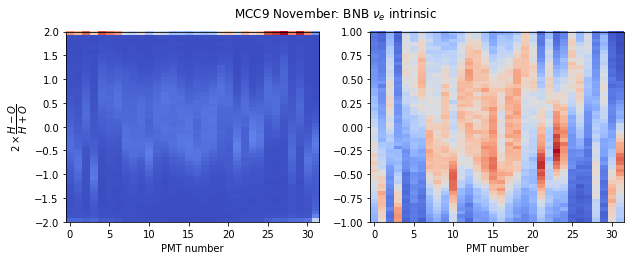

In [24]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,3.5))

ax[0].hist2d(x,y, range=((-0.5,31.5),(-2,2)), bins=(32,50), cmap="coolwarm")
ax[1].hist2d(x,y, range=((-0.5,31.5),(-1,1)), bins=(32,50), cmap="coolwarm")
ax[0].set_ylabel(r"$2 \times \dfrac{H-O}{H+O}$")
ax[0].set_xlabel(r"PMT number")
ax[1].set_xlabel(r"PMT number")

fig.suptitle(sample_name)
fig.savefig(outdir+"nue.pdf", bbox_inches='tight')

/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 4105.,  2744.,  4310.,  6668.,  6751.,  4818.,  2908.,  1783.,
         1259., 17471.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <a list of 10 Patch objects>)

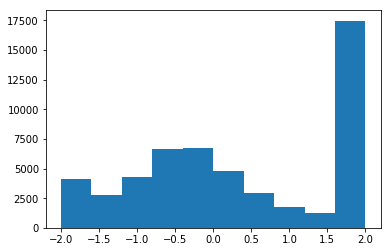

In [10]:
pmt0 = list(np.nan_to_num(y_vals).T[0])
plt.hist(pmt0, range=(-2,2))